## Importing The Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier


## Load The Dataset

In [3]:
df=pd.read_csv('drive/MyDrive/Insurance Dataset.csv')
df

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


## Summarize Data

In [4]:
df.shape

(1048575, 24)

In [5]:
df.size

25165800

In [6]:
#Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [7]:
# Descriptive statistics
df.describe()

,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.046119e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048533e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.529400e+02,1.987936e+02,9.723249e+01,2.051806e+00,1.748955e+00,2.935512e+02,2.708697e+04,1.046399e+04,4.565822e-01,7.499769e-01,1.935755e+00
std,6.711577e+02,1.652839e+02,8.732697e+01,9.145785e-01,9.864236e-01,9.494631e+02,5.487428e+04,2.230366e+04,8.029246e-01,4.330263e-01,7.717916e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,2.130000e+02,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.402500e+03,3.234570e+03,3.135802e-01,0.000000e+00,1.000000e+00
50%,6.300000e+02,1.590000e+02,9.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.458988e+04,5.928480e+03,4.091384e-01,1.000000e+00,2.000000e+00
75%,9.770000e+02,2.180000e+02,1.740000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.914547e+04,1.134317e+04,5.192548e-01,1.000000e+00,3.000000e+00
max,9.250000e+03,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


In [8]:
# Class proportion
result_counts = df.groupby('Result').size()
print(result_counts)

Result
0    262168
1    786407
dtype: int64


### Remove Unnecesary Column

In [9]:
df1=df.drop(['Hospital Id','Area_Service','Cultural_group','ethnicity','Abortion','Tot_cost','Weight_baby'],axis=1)

In [10]:
df1 = df1.rename({ 'Hospital County':'Hospital_County','Mortality risk': 'mortalityrisk','ratio_of_total_costs_to_total_charges':'ratio_ofcost_to_charge','Home or self care,':'home_or_selfcare','Emergency dept_yes/No':'emergency_dept' }, axis=1)

In [11]:
df1.head()

,Hospital_County,Age,Gender,Days_spend_hsptl,Admission_type,home_or_selfcare,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,mortalityrisk,Surg_Description,emergency_dept,Tot_charg,ratio_ofcost_to_charge,Result,Payment_Typology
0,Allegany,30 to 49,F,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,Y,5511.95,1.012798,1,1
1,Allegany,70 or Older,F,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,Y,4783.20,1.079365,1,1
2,Allegany,30 to 49,F,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,Y,3829.15,1.059379,1,1
3,Allegany,0 to 17,F,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,Y,1108.20,1.484167,0,1
4,Allegany,70 or Older,F,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,Y,3418.18,0.986161,1,1


In [12]:
df1.shape

(1048575, 17)

## Duplicates

In [13]:
#Count of duplicated rows
df1[df1.duplicated()].shape


(21686, 17)

In [14]:
#Print the duplicated rows
df1[df1.duplicated()]

,Hospital_County,Age,Gender,Days_spend_hsptl,Admission_type,home_or_selfcare,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,mortalityrisk,Surg_Description,emergency_dept,Tot_charg,ratio_ofcost_to_charge,Result,Payment_Typology
271,Allegany,0 to 17,M,3,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,2319.75,0.434788,0,1
291,Allegany,0 to 17,F,1,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,884.50,0.436447,1,1
352,Allegany,0 to 17,F,1,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,884.50,0.436447,1,1
502,Allegany,0 to 17,M,3,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,2319.75,0.434788,1,1
533,Allegany,0 to 17,F,2,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,N,1401.50,0.431629,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028997,Bronx,0 to 17,F,2,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,N,12557.00,0.235996,1,2
1035973,Bronx,0 to 17,F,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,N,12500.00,0.236809,1,3
1043713,Bronx,0 to 17,M,10,Emergency,Home or Self Care,135,0,"Other gastroenteritis, nausa & vomiting",3,3.0,Medical,Y,65223.50,0.304385,0,3
1044547,Bronx,0 to 17,M,4,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,N,24557.00,0.240041,1,2


In [15]:
#remove the duplicated rows
data=df1.drop_duplicates()

In [16]:
data.size

17457113

## Missing Values

In [17]:
data[data.isnull().any(axis=1)]

,Hospital_County,Age,Gender,Days_spend_hsptl,Admission_type,home_or_selfcare,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,mortalityrisk,Surg_Description,emergency_dept,Tot_charg,ratio_ofcost_to_charge,Result,Payment_Typology
12,NaN,30 to 49,M,2,Elective,Home or Self Care,126,0,Infections of upper respiratory tract,3,3.0,Medical,Y,2896.70,1.323580,1,1
16,NaN,30 to 49,M,3,Urgent,Home or Self Care,126,0,Infections of upper respiratory tract,1,1.0,Medical,Y,3472.25,1.172107,1,1
33,NaN,70 or Older,F,1,Urgent,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,Y,2509.75,1.050590,1,1
77,NaN,70 or Older,F,3,Elective,Skilled Nursing Home,58,202,"Malnutrition, failure to thrive & other nutrit...",3,2.0,Medical,N,2998.00,1.072593,1,2
86,NaN,30 to 49,F,4,Elective,Home or Self Care,159,0,Kidney & urinary tract infections,2,1.0,Medical,Y,4806.25,1.087221,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044288,NaN,18 to 29,F,1,Emergency,Home or Self Care,180,122,Ectopic pregnancy procedure,1,1.0,Surgical,Y,11398.46,0.196141,0,2
1044417,NaN,30 to 49,F,1,Emergency,Home or Self Care,177,127,"D&C, aspiration curettage or hysterotomy for o...",1,1.0,Surgical,Y,20093.35,0.232213,1,2
1044832,NaN,18 to 29,F,1,Emergency,Home or Self Care,180,122,Ectopic pregnancy procedure,1,1.0,Surgical,Y,9393.39,0.204617,1,3
1045584,NaN,30 to 49,F,1,Emergency,Home or Self Care,177,127,"D&C, aspiration curettage or hysterotomy for o...",1,1.0,Surgical,Y,23802.40,0.248288,0,2


In [18]:
#count of missing values.
data.isnull().sum()

Hospital_County           2455
Age                          0
Gender                       0
Days_spend_hsptl             0
Admission_type               0
home_or_selfcare             0
ccs_diagnosis_code           0
ccs_procedure_code           0
apr_drg_description          0
Code_illness                 0
mortalityrisk               39
Surg_Description             0
emergency_dept               0
Tot_charg                    0
ratio_ofcost_to_charge       0
Result                       0
Payment_Typology             0
dtype: int64

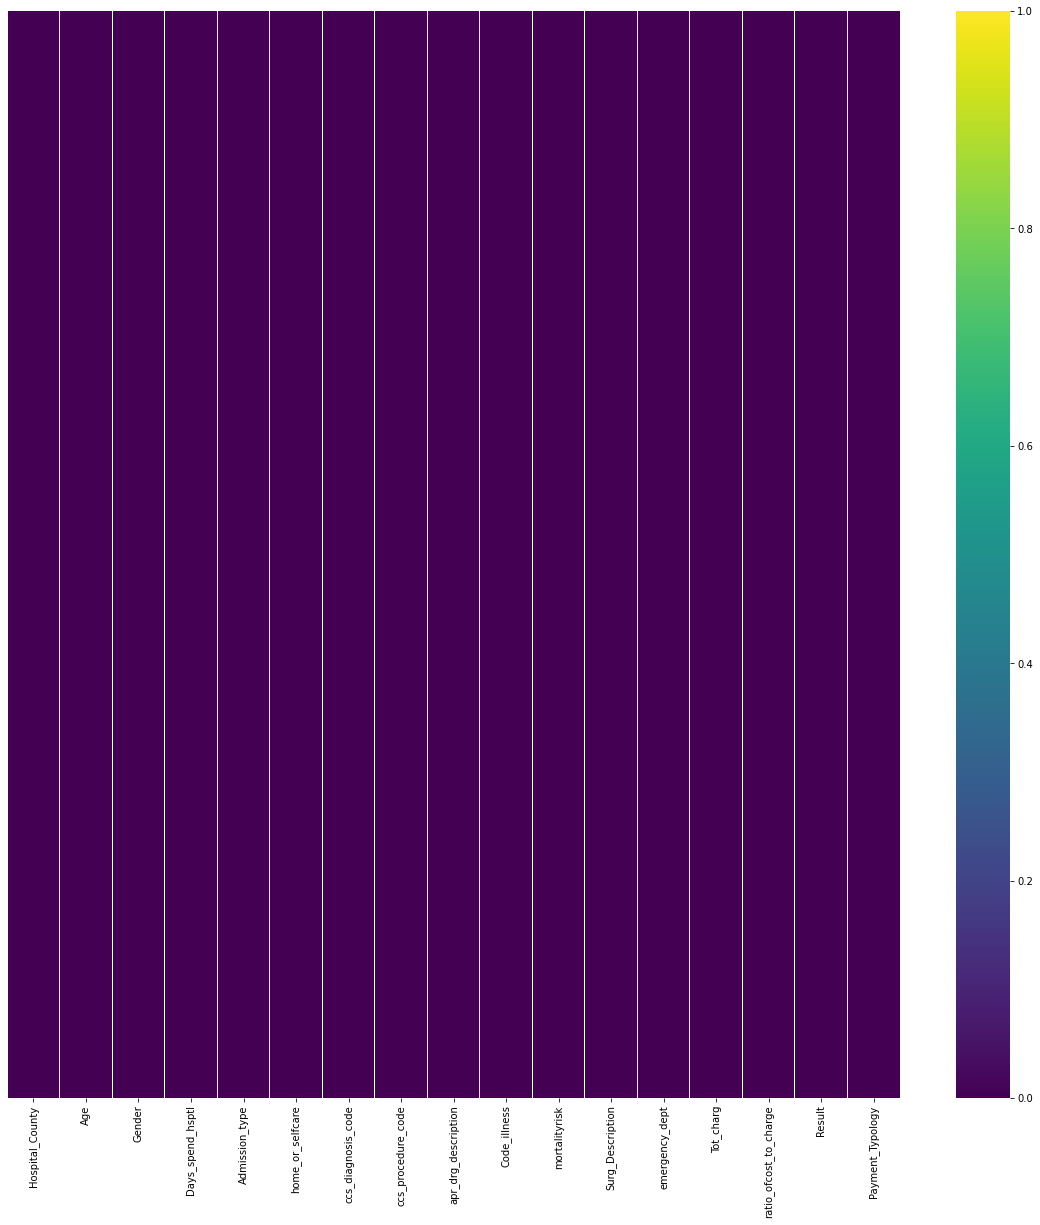

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [20]:
# Impute the missing values using median in numerical column.
data['mortalityrisk'].fillna(data.mortalityrisk.median(),inplace=True)

In [21]:
#drop the null values from categarical column.
df=data.dropna()

In [22]:
df.isnull().sum()

Hospital_County           0
Age                       0
Gender                    0
Days_spend_hsptl          0
Admission_type            0
home_or_selfcare          0
ccs_diagnosis_code        0
ccs_procedure_code        0
apr_drg_description       0
Code_illness              0
mortalityrisk             0
Surg_Description          0
emergency_dept            0
Tot_charg                 0
ratio_ofcost_to_charge    0
Result                    0
Payment_Typology          0
dtype: int64

In [23]:
#Datatype conversion
df['mortalityrisk']=df['mortalityrisk'].astype('int64')

In [24]:
df.dtypes

Hospital_County            object
Age                        object
Gender                     object
Days_spend_hsptl           object
Admission_type             object
home_or_selfcare           object
ccs_diagnosis_code          int64
ccs_procedure_code          int64
apr_drg_description        object
Code_illness                int64
mortalityrisk               int64
Surg_Description           object
emergency_dept             object
Tot_charg                 float64
ratio_ofcost_to_charge    float64
Result                      int64
Payment_Typology            int64
dtype: object

In [25]:
df['Days_spend_hsptl'].replace('120 +', 120,inplace=True)
df['Days_spend_hsptl']=pd.to_numeric(df['Days_spend_hsptl'])
df['Days_spend_hsptl'].unique()

array([  4,   3,   1,   2,   5,   6,  14,  12,   9,   8,  10,   7,  22,
        11,  16,  15,  25,  13,  17,  28,  18,  19,  23,  38,  20,  24,
        26,  21,  27,  30,  29,  39,  87,  35,  37,  32,  55,  56,  49,
       110,  69,  75,  42,  51,  47,  45,  46,  40,  34,  79,  43, 120,
        65,  41,  31,  50,  59,  44,  36,  70, 115,  58,  94,  33,  68,
        67,  54,  80,  85,  95,  78,  91,  88,  48,  52,  63,  57,  74,
        64,  53,  62,  97,  72, 118,  81,  90,  86, 106, 112, 105, 114,
        66,  89,  83,  84,  82,  93, 116,  71,  60,  73,  61,  92,  76,
        96,  77, 104, 100, 103, 102, 117, 108,  99, 107,  98, 101, 119,
       111, 109, 113])

In [26]:
df

,Hospital_County,Age,Gender,Days_spend_hsptl,Admission_type,home_or_selfcare,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,mortalityrisk,Surg_Description,emergency_dept,Tot_charg,ratio_ofcost_to_charge,Result,Payment_Typology
0,Allegany,30 to 49,F,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1,Medical,Y,5511.95,1.012798,1,1
1,Allegany,70 or Older,F,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2,Medical,Y,4783.20,1.079365,1,1
2,Allegany,30 to 49,F,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1,Medical,Y,3829.15,1.059379,1,1
3,Allegany,0 to 17,F,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1,Medical,Y,1108.20,1.484167,0,1
4,Allegany,70 or Older,F,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3,Medical,Y,3418.18,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,Bronx,70 or Older,F,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3,Medical,Y,69650.41,0.199522,1,3
1048571,Bronx,0 to 17,F,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1,Medical,N,13587.38,0.288382,1,3
1048572,Bronx,50 to 69,M,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4,Medical,Y,104629.78,0.236516,0,3
1048573,Bronx,30 to 49,F,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1,Surgical,Y,27521.41,0.245846,1,3


## Oulier Detection
###### We will use IQR (Interquartile Range Method) to deal with outliers.

Text(0, 0.5, 'Frequency')

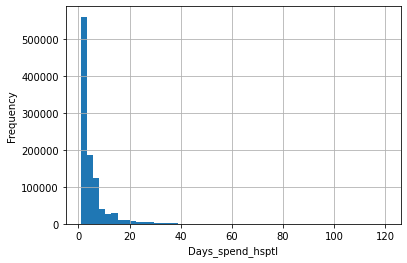

In [ ]:
figure=df.Days_spend_hsptl.hist(bins=50)
figure.set_xlabel('Days_spend_hsptl')
figure.set_ylabel('Frequency')

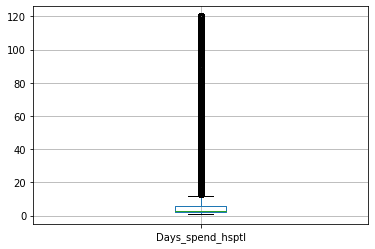

In [ ]:
df.boxplot(column="Days_spend_hsptl")

In [ ]:
df['Days_spend_hsptl'].max()

120

In [ ]:
df['Days_spend_hsptl'].min()

1

In [ ]:
#Logarithmic Transformation
df['Days_spend_hsptl'] =np.log(df['Days_spend_hsptl'] )

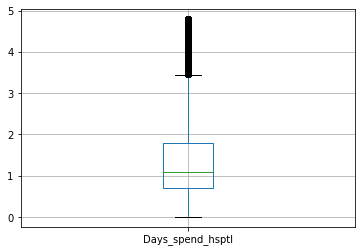

In [ ]:
df.boxplot(column="Days_spend_hsptl")

In [ ]:
df['Days_spend_hsptl'].describe()

count    1.024434e+06
mean     1.259453e+00
std      8.598809e-01
min      0.000000e+00
25%      6.931472e-01
50%      1.098612e+00
75%      1.791759e+00
max      4.787492e+00
Name: Days_spend_hsptl, dtype: float64

In [ ]:
# Lets compute the Interquantile range to calculate the boundaries
IQR=df.Days_spend_hsptl.quantile(0.75)-df.Days_spend_hsptl.quantile(0.25)
IQR

1.0986122886681096

In [ ]:
lower_bridge=df['Days_spend_hsptl'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Days_spend_hsptl'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-0.954771252442219
3.439677902230219


(None, None)

In [ ]:
#Extreme outliers
lower_bridge=df['Days_spend_hsptl'].quantile(0.25)-(IQR*3)
upper_bridge=df['Days_spend_hsptl'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-2.6026896854443833
5.087596335232384


(None, None)

In [ ]:
df.loc[df['Days_spend_hsptl']>= 5,'Days_spend_hsptl']= 5

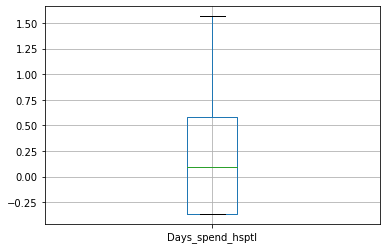

In [ ]:
df.boxplot(column="Days_spend_hsptl")

Text(0, 0.5, 'Frequency')

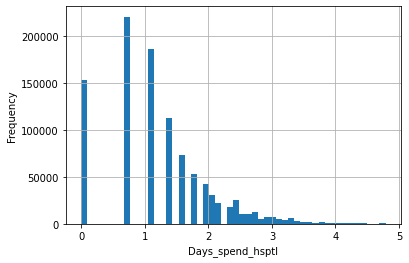

In [ ]:
figure=df.Days_spend_hsptl.hist(bins=50)
figure.set_xlabel('Days_spend_hsptl')
figure.set_ylabel('Frequency')

## Feature Engineering

Label Encoding for non-numerical columns

In [ ]:
x=df.iloc[:, [0,1,2,4,5,8,11,12]]
x

,Hospital_County,Age,Gender,Admission_type,home_or_selfcare,apr_drg_description,Surg_Description,emergency_dept
0,Allegany,30 to 49,F,Elective,Home or Self Care,Other pneumonia,Medical,Y
1,Allegany,70 or Older,F,Urgent,Short-term Hospital,Cellulitis & other skin infections,Medical,Y
2,Allegany,30 to 49,F,Urgent,Home or Self Care,Other pneumonia,Medical,Y
3,Allegany,0 to 17,F,Urgent,Home or Self Care,Other pneumonia,Medical,Y
4,Allegany,70 or Older,F,Elective,Home or Self Care,Other pneumonia,Medical,Y
...,...,...,...,...,...,...,...,...
1048570,Bronx,70 or Older,F,Emergency,Skilled Nursing Home,Cardiac arrhythmia & conduction disorders,Medical,Y
1048571,Bronx,0 to 17,F,Emergency,Home or Self Care,Other infectious & parasitic diseases,Medical,N
1048572,Bronx,50 to 69,M,Emergency,Medicare Cert Long Term Care Hospital,Hepatic coma & other major acute liver disorders,Medical,Y
1048573,Bronx,30 to 49,F,Emergency,Home or Self Care,"Inguinal, femoral & umbilical hernia procedures",Surgical,Y


In [ ]:
Labelencoder_X= LabelEncoder()
X=x.apply(LabelEncoder().fit_transform)
X

,Hospital_County,Age,Gender,Admission_type,home_or_selfcare,apr_drg_description,Surg_Description,emergency_dept
0,1,2,0,0,7,237,0,1
1,1,4,0,5,17,38,0,1
2,1,2,0,5,7,237,0,1
3,1,0,0,5,7,237,0,1
4,1,4,0,0,7,237,0,1
...,...,...,...,...,...,...,...,...
1048570,2,4,0,1,18,28,0,1
1048571,2,0,0,1,7,227,0,0
1048572,2,3,1,1,15,99,0,1
1048573,2,2,0,1,7,109,2,1


In [ ]:
X.dtypes

Hospital_County        int64
Age                    int64
Gender                 int64
Admission_type         int64
home_or_selfcare       int64
apr_drg_description    int64
Surg_Description       int64
emergency_dept         int64
dtype: object

In [ ]:
data=df.drop(["Hospital_County","Age","Gender","Admission_type","home_or_selfcare","apr_drg_description","Surg_Description","emergency_dept"],axis=1)

In [ ]:
fraud=pd.concat([X,data],axis=1)
fraud

,Hospital_County,Age,Gender,Admission_type,home_or_selfcare,apr_drg_description,Surg_Description,emergency_dept,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,Code_illness,mortalityrisk,Tot_charg,ratio_ofcost_to_charge,Result,Payment_Typology
0,1,2,0,0,7,237,0,1,4,122,0,1,1,5511.95,1.012798,1,1
1,1,4,0,5,17,38,0,1,4,197,0,3,2,4783.20,1.079365,1,1
2,1,2,0,5,7,237,0,1,3,122,0,1,1,3829.15,1.059379,1,1
3,1,0,0,5,7,237,0,1,1,122,0,1,1,1108.20,1.484167,0,1
4,1,4,0,0,7,237,0,1,3,122,0,2,3,3418.18,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,4,0,1,18,28,0,1,6,106,29,2,3,69650.41,0.199522,1,3
1048571,2,0,0,1,7,227,0,0,2,8,231,2,1,13587.38,0.288382,1,3
1048572,2,3,1,1,15,99,0,1,13,151,88,4,4,104629.78,0.236516,0,3
1048573,2,2,0,1,7,109,2,1,2,143,86,1,1,27521.41,0.245846,1,3


In [ ]:
fraud.shape

(1024434, 17)

## Feature Selection(Extra Trees Classifier)

In [ ]:
x = fraud.drop(['Result'],axis = 1)# independent features
y = fraud['Result']# dependent feature

In [ ]:
#Feature Importance:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_) 

[0.08104094 0.03012766 0.01054035 0.00938228 0.04166692 0.07137619
 0.00187945 0.00307241 0.10285759 0.08479726 0.05833225 0.02216489
 0.01461264 0.22244747 0.21677554 0.02892616]


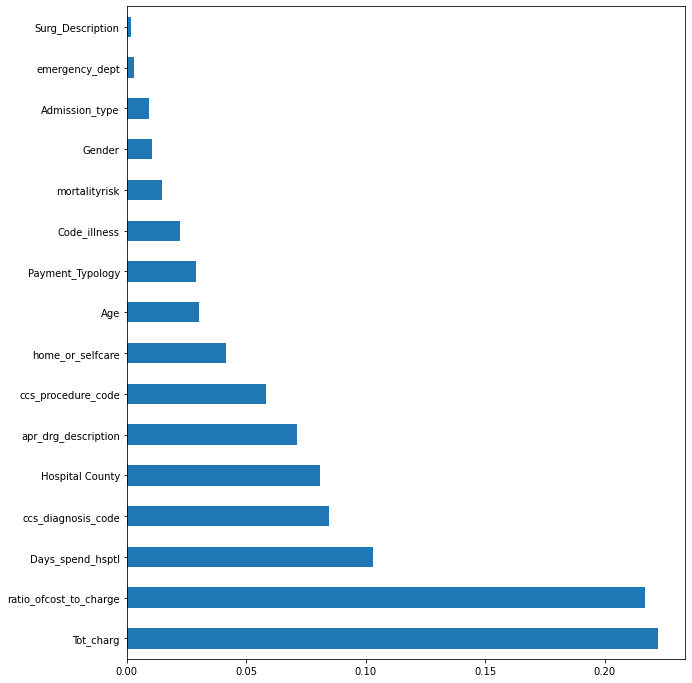

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,12))
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
X=x.drop(['Surg_Description'],axis=1)

## Check whether the data is balanced or not

[Text(0, 0, 'Fraud'), Text(0, 0, 'Genuine')]

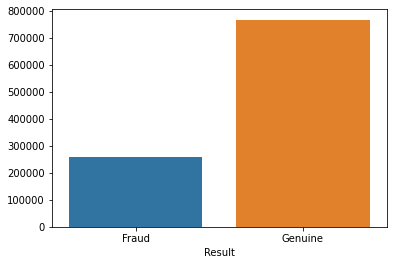

In [ ]:
bar = fraud.groupby("Result").count().iloc[:,0]
t=sns.barplot(x = bar.index, y=bar.values)
t.set_xticklabels(['Fraud','Genuine'])

In [ ]:
y.value_counts(normalize=True)

1    0.748505
0    0.251495
Name: Result, dtype: float64

### Here we can see that our data is highly imbalanced.

## Spliting the data into training and Testing datset to avoid overfitting.

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=None)

## Handling The Imbalanced Data Using SMOTE
As our data is highly imbalnced we are using SMOTE method for handling it.

In [92]:
## SMOTE to handle imbalanced data
from collections import Counter
Counter(y_train)

Counter({0: 172503, 1: 513867})

In [93]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
smote = SMOTE(random_state=50)
print("The number of classes before fit {}".format(Counter(y_train)))
train_df_smote, y_smote = smote.fit_resample(X_train, y_train)

X_train = train_df_smote
y_train = y_smote

y_train_org = np.argmax(y_train, axis=-1)


print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes before fit Counter({1: 513867, 0: 172503})
The number of classes after fit Counter({1: 513867, 0: 513867})


In [94]:
print("The number of classes before fit {}".format(Counter(y_test)))
test_df_smote, y_smote = smote.fit_resample(X_test, y_test)

X_test = test_df_smote
y_test = y_smote

y_test_org = np.argmax(y_test, axis=-1)


print("The number of classes after fit {}".format(Counter(y_test)))

The number of classes before fit Counter({1: 252927, 0: 85137})
The number of classes after fit Counter({1: 252927, 0: 252927})


# Model Building

In [ ]:
result_df = {
    "model":[],
    "training_score" :[],
    "testing_score": []
}

def modify_result(model, trainSc, testSc):
    result_df["model"].append(model)
    result_df["training_score"].append(trainSc)
    result_df["testing_score"].append(testSc)

## Random Forest Classifier

In [ ]:
#Random forest classifier after hyperparameter tunning
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,max_features=8,min_samples_leaf=6,min_samples_split=5,n_jobs=-1)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
y_pred = classifier.predict(X_test)
ytrain_pred =classifier.predict_proba(X_train)
ytest_pred = classifier.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Random forest classifier",
             accuracy_score(classifier.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.9886658783365289
Testing Score:0.828141621564847


In [ ]:
y_pred=classifier.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[379100 134286]
 [  1994 511392]]
0.867273357668499
              precision    recall  f1-score   support

           0       0.99      0.74      0.85    513386
           1       0.79      1.00      0.88    513386

    accuracy                           0.87   1026772
   macro avg       0.89      0.87      0.87   1026772
weighted avg       0.89      0.87      0.87   1026772



In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[166707  86701]
 [  4177 249231]]
0.820688376057583
              precision    recall  f1-score   support

           0       0.98      0.66      0.79    253408
           1       0.74      0.98      0.85    253408

    accuracy                           0.82    506816
   macro avg       0.86      0.82      0.82    506816
weighted avg       0.86      0.82      0.82    506816



## XGBoost Classifier

In [95]:

import xgboost 
from xgboost import XGBClassifier
clf =XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,eval_metric='auc',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)

In [96]:
y_pred = clf.predict(X_test)
ytrain_pred =clf.predict_proba(X_train)
ytest_pred = clf.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("XGBoost",
             accuracy_score(clf.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.83499434920546
Testing Score:0.8321709507716197


In [97]:
y_pred=clf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[334404 179463]
 [    32 513835]]
0.8253487770181779
              precision    recall  f1-score   support

           0       1.00      0.65      0.79    513867
           1       0.74      1.00      0.85    513867

    accuracy                           0.83   1027734
   macro avg       0.87      0.83      0.82   1027734
weighted avg       0.87      0.83      0.82   1027734



In [ ]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[165886  87522]
 [    26 253382]]
0.8272588079302943
              precision    recall  f1-score   support

           0       1.00      0.65      0.79    253408
           1       0.74      1.00      0.85    253408

    accuracy                           0.83    506816
   macro avg       0.87      0.83      0.82    506816
weighted avg       0.87      0.83      0.82    506816



### Hyperparameter optimization using RandomizedSearchCV in XGBoost

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,refit=True,cv=10,verbose=3)

In [ ]:
random_search.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   p

In [ ]:
random_search.estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

classifier=xgboost.XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,eval_metric='auc',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[100044  53261]
 [    13 153292]]
0.8262483284954829
              precision    recall  f1-score   support

           0       1.00      0.65      0.79    153305
           1       0.74      1.00      0.85    153305

    accuracy                           0.83    306610
   macro avg       0.87      0.83      0.82    306610
weighted avg       0.87      0.83      0.82    306610



##Gradient Boosting Classifier

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
clf_gr = GradientBoostingClassifier(n_estimators= 100,learning_rate =0.01, max_depth = 3, random_state = 0)
clf_gr.fit(X_train, y_train)

pred_gr = clf_gr.predict(X_test)

print('(learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf_gr.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {}'
     .format(clf_gr.score(X_test, y_test)))
print('Accuracy score: {}'.format(accuracy_score(y_test, pred_gr)))

print('y_test and pred: {}'.format(y_test[:20]))
print('pred: {}'.format(pred_gr))
from sklearn.metrics import classification_report
reportLReg_gf = classification_report(y_test, pred_gr, output_dict=True)
crLReg_gf = pd.DataFrame(reportLReg_gf).transpose()
crLReg_gf


(learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.77
Accuracy of GBDT classifier on test set: 0.7753563423412047
Accuracy score: 0.7753563423412047
y_test and pred: [1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0]
pred: [1 1 1 ... 0 1 0]


,precision,recall,f1-score,support
0,1.000000,0.550713,0.710270,253408.000000
1,0.689994,1.000000,0.816564,253408.000000
accuracy,0.775356,0.775356,0.775356,0.775356
macro avg,0.844997,0.775356,0.763417,506816.000000
weighted avg,0.844997,0.775356,0.763417,506816.000000


In [ ]:
y_pred = clf_gr.predict(X_test)
ytrain_pred =clf_gr.predict_proba(X_train)
ytest_pred = clf_gr.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Gradient Boosting",
             accuracy_score(clf_gr.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.7996055308355632
Testing Score:0.8028130966869635


In [ ]:
y_pred=clf_gr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[139555 113853]
 [     0 253408]]
0.7753563423412047
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    253408
           1       0.69      1.00      0.82    253408

    accuracy                           0.78    506816
   macro avg       0.84      0.78      0.76    506816
weighted avg       0.84      0.78      0.76    506816



## Easy Ensemble Classifier

In [ ]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
easy=EasyEnsembleClassifier( n_estimators=20, n_jobs=-1,random_state=42)
easy.fit(X_train,y_train)

EasyEnsembleClassifier(base_estimator=None, n_estimators=20, n_jobs=-1,
                       random_state=42, replacement=False,
                       sampling_strategy='auto', verbose=0, warm_start=False)

In [ ]:
y_pred = easy.predict(X_test)
ytrain_pred =easy.predict_proba(X_train)
ytest_pred = easy.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Easy Ensemble Classifier",
             accuracy_score(easy.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.8182399195146846
Testing Score:0.8212281717099228


In [ ]:

y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[157843  95565]
 [  6210 247198]]
0.799187476322768
              precision    recall  f1-score   support

           0       0.96      0.62      0.76    253408
           1       0.72      0.98      0.83    253408

    accuracy                           0.80    506816
   macro avg       0.84      0.80      0.79    506816
weighted avg       0.84      0.80      0.79    506816



## Guassian Naive Bayes

In [ ]:
#Guassian Naive Bayes
from sklearn.naive_bayes import GaussianNB as GB
classifier= GB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)
ytrain_pred =classifier.predict_proba(X_train)
ytest_pred = classifier.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Guassian Naive Bayes",
             accuracy_score(classifier.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.5547834742863293
Testing Score:0.5603277088187298


In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[219197  34211]
 [205334  48074]]
0.5273531222376563
              precision    recall  f1-score   support

           0       0.52      0.86      0.65    253408
           1       0.58      0.19      0.29    253408

    accuracy                           0.53    506816
   macro avg       0.55      0.53      0.47    506816
weighted avg       0.55      0.53      0.47    506816



## AdaBoost Classifier

In [ ]:
##Adaboost classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=None)

In [ ]:
y_pred = model.predict(X_test)
ytrain_pred =model.predict_proba(X_train)
ytest_pred = model.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Adaboost classifier",
             accuracy_score(model.predict(X_train), y_train),
             accuracy_score(y_test,y_pred))

Training Score: 0.7487393133144461
Testing Score:0.7490460294196151


In [ ]:
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[130910 122498]
 [     0 253408]]
0.7582988698067938
              precision    recall  f1-score   support

           0       1.00      0.52      0.68    253408
           1       0.67      1.00      0.81    253408

    accuracy                           0.76    506816
   macro avg       0.84      0.76      0.74    506816
weighted avg       0.84      0.76      0.74    506816



## Logistic Regression

In [107]:
#logistic regression
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression()
clf1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
y_pred = clf1.predict(X_test)
ytrain_pred =clf.predict_proba(X_train)
ytest_pred = clf.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Logistic Regression",
             accuracy_score(clf1.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 0.83499434920546
Testing Score:0.8321709507716197


In [112]:
y_pred = clf1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[252927      0]
 [252927      0]]
0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67    252927
           1       0.00      0.00      0.00    252927

    accuracy                           0.50    505854
   macro avg       0.25      0.50      0.33    505854
weighted avg       0.25      0.50      0.33    505854



## KNeighbors Classifier

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_classifier.predict(X_test)
ytrain_pred =knn_classifier.predict_proba(X_train)
ytest_pred = knn_classifier.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("KNN",
             accuracy_score(knn_classifier.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 0.9049405716070571
Testing Score:0.5045093786755297


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[112442 140966]
 [110629 142779]]
0.5035772351306983
              precision    recall  f1-score   support

           0       0.50      0.44      0.47    253408
           1       0.50      0.56      0.53    253408

    accuracy                           0.50    506816
   macro avg       0.50      0.50      0.50    506816
weighted avg       0.50      0.50      0.50    506816



## DecisionTree Classifier

In [103]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
y_pred = model.predict(X_test)
ytrain_pred = model.predict_proba(X_train)
ytest_pred = model.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Decision Tree Classifier",
             accuracy_score(model.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 0.999993512440043
Testing Score:0.731136010947657


In [106]:
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[186295  66632]
 [ 69784 183143]]
0.7303253507929165
              precision    recall  f1-score   support

           0       0.73      0.74      0.73    252927
           1       0.73      0.72      0.73    252927

    accuracy                           0.73    505854
   macro avg       0.73      0.73      0.73    505854
weighted avg       0.73      0.73      0.73    505854



## Bagging Classifier

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100

model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model1.predict(X_test)
ytrain_pred = model1.predict_proba(X_train)
ytest_pred = model1.predict_proba(X_test)
print("Training Score: {}".format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("Testing Score:{}". format(roc_auc_score(y_test, ytest_pred[:,1])))
modify_result("Bagged Decision Tree Classifier",
             accuracy_score(model1.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))

Training Score: 0.9999919220211121
Testing Score:0.8248240217835754


In [74]:
y_pred=model1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[169119  84289]
 [ 13040 240368]]
0.8079598907690365
              precision    recall  f1-score   support

           0       0.93      0.67      0.78    253408
           1       0.74      0.95      0.83    253408

    accuracy                           0.81    506816
   macro avg       0.83      0.81      0.80    506816
weighted avg       0.83      0.81      0.80    506816



## SVM

In [84]:
#SVM
from sklearn import svm

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
clff = SVC(probability=True)
clff.fit(X_train,y_train)
ytrain_pred = clff.predict_proba(X_train)
print('Training Score: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = clff.predict_proba(X_test)
print('Testing Score: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

modify_result("SVM",
             accuracy_score(clff.predict(X_train), y_train),
             accuracy_score(y_test, y_pred))


Training Score: 0.5112282318896646
Testing Score: 0.5103042822398558


In [85]:
y_pred=clff.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[819 654]
 [809 664]]
0.5033944331296674
              precision    recall  f1-score   support

           0       0.50      0.56      0.53      1473
           1       0.50      0.45      0.48      1473

    accuracy                           0.50      2946
   macro avg       0.50      0.50      0.50      2946
weighted avg       0.50      0.50      0.50      2946



### Compare the algorithms

In [86]:
data=pd.DataFrame(result_df)
data.sort_values(['testing_score'],ascending=False)

,model,training_score,testing_score
1,XGBoost,0.824764,0.827259
0,Random forest classifier,0.867273,0.820688
9,Bagged Decision Tree Classifier,0.998181,0.807960
3,Easy Ensemble Classifier,0.796539,0.799187
2,Gradient Boosting,0.772443,0.775356
5,Adaboost classifier,0.755410,0.758299
8,Decision Tree Classifier,0.998189,0.729959
4,Guassian Naive Bayes,0.525014,0.527353
7,KNN,0.804208,0.503577
10,SVM,0.506200,0.503394


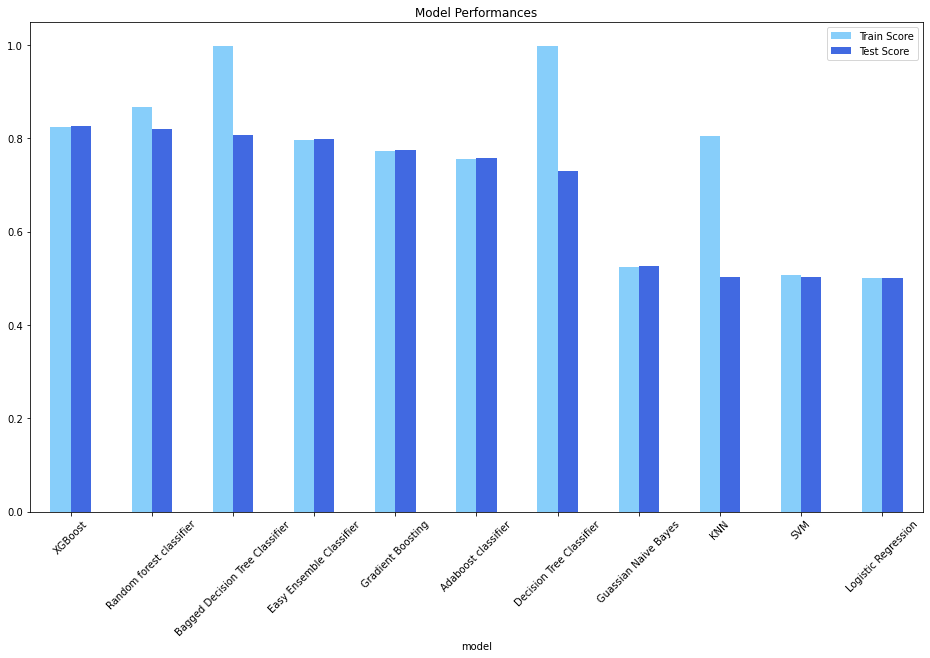

In [87]:
data = pd.DataFrame(result_df)
data.sort_values(by="testing_score", ascending=False).plot(kind="bar", x="model", rot=45, figsize=(16,9),color=["lightskyblue","royalblue"])
plt.title("Model Performances")
plt.ylabel=("Accuracy Score")
plt.xlabel=("Models")
plt.legend(["Train Score","Test Score"])

## Finalize Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,max_features=8,min_samples_leaf=6,min_samples_split=5,n_jobs=-1)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[166031  87092]
 [  3943 249180]]
0.8201763569489932
              precision    recall  f1-score   support

           0       0.98      0.66      0.78    253123
           1       0.74      0.98      0.85    253123

    accuracy                           0.82    506246
   macro avg       0.86      0.82      0.82    506246
weighted avg       0.86      0.82      0.82    506246



## Best Thresholds and ROC Curve

In [ ]:
pred=[]
for model in [clf]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8316070831032812


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.8353230e+00, 8.3532298e-01, 8.1541800e-01, ..., 5.1719766e-08,
       5.1392998e-08, 8.4839415e-09], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
146641,0.579066,0.826810
146635,0.579694,0.826810
146634,0.579782,0.826810
146636,0.579590,0.826808
146639,0.579381,0.826808


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

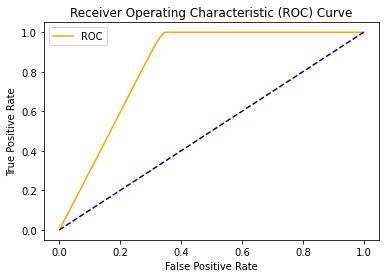

In [ ]:
plot_roc_curve(fpr,tpr)

## Training Model on Complete Dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_os, y_train_os = smote.fit_resample(X, y)

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_os)))

Original dataset shape Counter({1: 766794, 0: 257640})
Resampled dataset shape Counter({1: 766794, 0: 766794})


In [ ]:
import xgboost 
from xgboost import XGBClassifier
clf =XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,eval_metric='auc',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)
clf.fit(x_train_os, y_train_os)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              silent=None, subsample=1, verbosity=1)

### Overall Accuracy

In [ ]:
#overall Accuracy
pred=clf.predict(x_train_os)
print(confusion_matrix(y_train_os, pred))
print(classification_report(y_train_os,pred))

[[498352 268442]
 [    32 766762]]
              precision    recall  f1-score   support

           0       1.00      0.65      0.79    766794
           1       0.74      1.00      0.85    766794

    accuracy                           0.82   1533588
   macro avg       0.87      0.82      0.82   1533588
weighted avg       0.87      0.82      0.82   1533588



## Model Saving 

In [ ]:
import pickle
with open('model_final','wb') as f:
 pickle.dump(classifier,f)